# Strategy Pattern

Strategy Pattern

Head First Design Patterns example in TypeScript

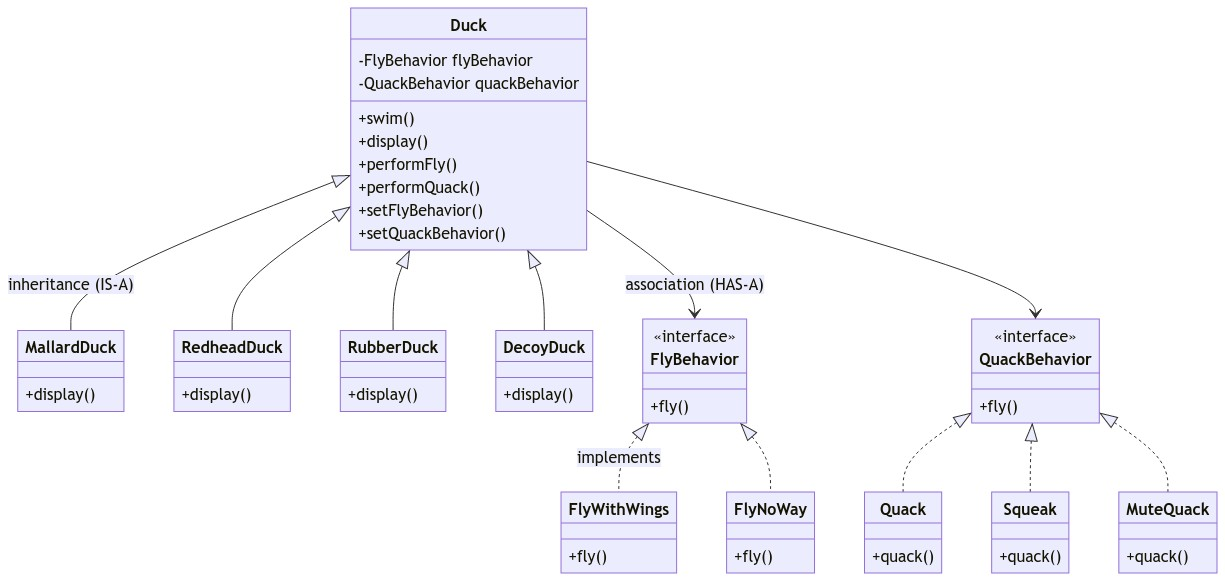

In [ ]:
//#region Encapsulated by fly behavior

interface FlyBehavior {
  fly(): void;
}

class FlyWithWings implements FlyBehavior {
  fly() {
    console.log("I'm flying with my wings");
  }
}

class FlyNoWay implements FlyBehavior {
  fly() {
    console.log("I can't fly");
  }
}

//#endregion

//#region Encapsulated by quack behavior

interface QuackBehavior {
  quack(): void;
}

class Quack implements QuackBehavior {
  quack() {
    console.log('Quack');
  }
}

class Squeak implements QuackBehavior {
  quack() {
    console.log('Squeak');
  }
}

class MuteQuack implements QuackBehavior {
  quack() {
    console.log('<< Silence >>');
  }
}

//#endregion

//#region Client

abstract class Duck {
  flyBehavior: FlyBehavior;
  quackBehavior: QuackBehavior;

  Duck() {}

  abstract display(): void;

  performFly() {
    this.flyBehavior.fly();
  }

  performQuack() {
    this.quackBehavior.quack();
  }

  setFlyBehavior(flyBehavior: FlyBehavior) {
    this.flyBehavior = flyBehavior;
  }
  
  setQuackBehavior(quackBehavior: QuackBehavior) {
    this.quackBehavior = quackBehavior;
  }

  swim() {
    console.log('All ducks float');
  }
}

//#region Ducks

class MallardDuck extends Duck {
  constructor() {
    super();
    this.quackBehavior = new Quack();
    this.flyBehavior = new FlyWithWings();
  }

  display(): void {
    console.log("I'm a Mallard duck");
  }
}

//#endregion

//#endregion

//#region Simulator

console.log('Mallard duck:');
const mallard = new MallardDuck();
mallard.performQuack();
mallard.performFly();

//#endregion


Mallard duck:
Quack
I'm flying with my wings


In [ ]:
//#region Client

//#region Ducks

class ModelDuck extends Duck {
  constructor() {
    super();
    this.quackBehavior = new Quack();
    this.flyBehavior = new FlyNoWay();
  }

  display(): void {
    console.log("I'm a Model duck");
  }
}

//#endregion

//#endregion

//#region Simulator

console.log('Model duck:');
const model = new ModelDuck();
model.performFly();
model.setFlyBehavior(new FlyWithWings());
model.performFly();

//#endregion

Model duck:
I can't fly
I'm flying with my wings


In [ ]:
class FlyRocketPowered implements FlyBehavior {
  fly() {
    console.log("I'm flying with rocket power");
  }
}

model.setFlyBehavior(new FlyRocketPowered());
model.performFly();

I'm flying with rocket power


Head First Design Patterns Design Puzzle in TypeScript

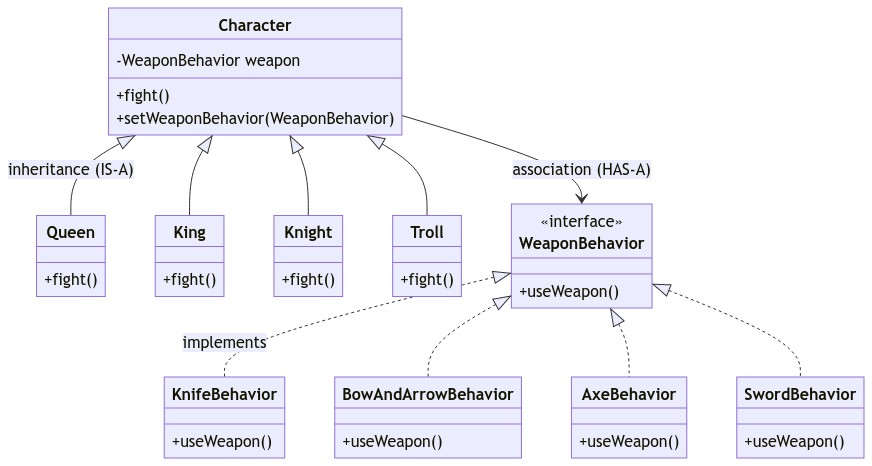

Refactoring Guru Strategy Pattern in TypeScript

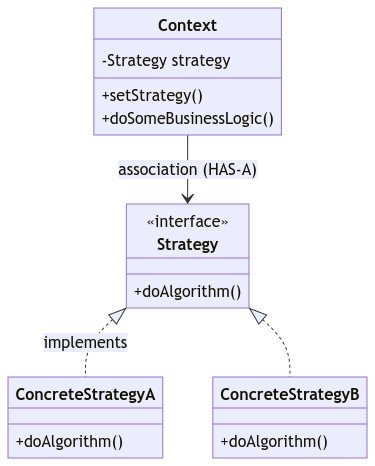

In [ ]:
//#region Client

class Context {
  private strategy: Strategy;

  constructor(strategy: Strategy) {
    this.setStrategy(strategy);
  }

  setStrategy(strategy: Strategy) {
    this.strategy = strategy;
  }

  doSomeBusinessLogic() {
    console.log('Context: Sorting data using the strategy (not sure how it\'ll do it)');
    const result = this.strategy.doAlgorithm(['a', 'b', 'c', 'd', 'e']);
    console.log(result.join(','));
  }
}

//#endregion

interface Strategy {
  doAlgorithm(data: string[]): string[];
}

class ConcreteStrategyA implements Strategy {
  doAlgorithm(data: string[]): string[] {
    return data.sort();
  }
}

class ConcreteStrategyB implements Strategy {
  doAlgorithm(data: string[]): string[] {
    return data.reverse();
  }
}

const context = new Context(new ConcreteStrategyA());
console.log('Client: Strategy is set to normal sorting.');
context.doSomeBusinessLogic();

console.log('');

console.log('Client: Strategy is set to reverse sorting.');
context.setStrategy(new ConcreteStrategyB());
context.doSomeBusinessLogic();


Client: Strategy is set to normal sorting.
Context: Sorting data using the strategy (not sure how it'll do it)
a,b,c,d,e

Client: Strategy is set to reverse sorting.
Context: Sorting data using the strategy (not sure how it'll do it)
e,d,c,b,a
